In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from keras.models import load_model
model2 = load_model('/content/drive/My Drive/NLP/models/FASTText_LSTM_10_epochs.h5')
#0 --> negative
#1 --> positive

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 280, 300)          12000000  
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                42624     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 12,042,690
Trainable params: 12,042,690
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dataset = '/content/drive/My Drive/NLP/COVID/TweetsWIthEMoticonFeb.csv'

In [ ]:
import pandas as pd 
data = pd.read_csv(dataset) 
data.head()

,id,date,text,emoticon,polarity,subjectivity,country
0,1.227360e+18,2/12/2020 3:39,Coronavirus UPDATE CONFIRMED CASES WORLDWIDE =...,[],0.022222,0.822222,Pakistan
1,1.227360e+18,2/12/2020 3:22,BREAKING Epicenter coronavirus outbreak report...,[],0.136364,0.454545,Pakistan
2,1.227330e+18,2/12/2020 1:35,The WorldHealthOrganization WHO said vaccine c...,[],0.200000,0.500000,Pakistan
3,1.227330e+18,2/12/2020 1:32,Germany confirmed two cases coronavirus southe...,[],0.100000,0.437500,Pakistan
4,1.227320e+18,2/12/2020 1:10,The World Health Organization says official na...,[],0.136364,0.454545,Pakistan


In [ ]:
data.count()

id              27357
date            27357
text            27357
emoticon        27357
polarity        27357
subjectivity    27357
country         27357
dtype: int64

In [ ]:
data.country.value_counts()

USA         10295
India        8455
Canada       5367
Pakistan     2501
Sweden        571
Norway        168
Name: country, dtype: int64

In [ ]:
data.emoticon.value_counts()

[]    27357
Name: emoticon, dtype: int64

In [ ]:
data.lang.value_counts()

en    310848
Name: lang, dtype: int64

In [ ]:
data.count()

status_id               310848
user_id                 310848
created_at              310848
screen_name             310848
text                    310848
source                  310848
reply_to_status_id       44171
reply_to_user_id         54910
reply_to_screen_name     54910
is_quote                310848
is_retweet              310848
favourites_count        310848
retweet_count           310848
country_code             18444
place_full_name          18568
place_type               18568
followers_count         310848
friends_count           310848
account_lang                 0
account_created_at      310848
verified                310848
lang                    310848
dtype: int64

In [ ]:
data.country.value_counts()

USA         10295
India        8455
Canada       5367
Pakistan     2501
Sweden        571
Norway        168
Name: country, dtype: int64

In [ ]:
data_copy = data
data_copy.count()

status_id               310848
user_id                 310848
created_at              310848
screen_name             310848
text                    310848
source                  310848
reply_to_status_id       44171
reply_to_user_id         54910
reply_to_screen_name     54910
is_quote                310848
is_retweet              310848
favourites_count        310848
retweet_count           310848
country_code             18444
place_full_name          18568
place_type               18568
followers_count         310848
friends_count           310848
account_lang                 0
account_created_at      310848
verified                310848
lang                    310848
dtype: int64

In [ ]:
data_copy.drop(data_copy.loc[data_copy.country_code != 'PK'].index, inplace=True)

In [ ]:
data_copy.count()

status_id               304
user_id                 304
created_at              304
screen_name             304
text                    304
source                  304
reply_to_status_id       23
reply_to_user_id         30
reply_to_screen_name     30
is_quote                304
is_retweet              304
favourites_count        304
retweet_count           304
country_code            304
place_full_name         304
place_type              304
followers_count         304
friends_count           304
account_lang              0
account_created_at      304
verified                304
lang                    304
dtype: int64

In [ ]:
data_copy.head()

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
2232,1243690434699952133,229036346,2020-03-28T00:04:40Z,muhemran,#COVID19 - #coronavirusinpakistan please #Stay...,Twitter for iPhone,NaN,NaN,NaN,False,False,3261,0,PK,"Peshawar, Pakistan",city,2612,979,NaN,2010-12-21T10:23:58Z,False,en
4653,1243691875934130176,2815321160,2020-03-28T00:10:24Z,MunafKalia,#Coronavirus global as on 27/3/20:\n\nTotal ca...,Twitter for iPhone,NaN,NaN,NaN,False,False,94,0,PK,"Karachi, Pakistan",city,242,109,NaN,2014-09-17T17:34:14Z,False,en
21229,1243703175988817921,259788895,2020-03-28T00:55:18Z,hmbilal1992,#COVID19 is proving a fortune for nature. Disr...,Twitter for Android,NaN,NaN,NaN,False,False,6735,0,PK,"Punjab, Pakistan",admin,880,82,NaN,2011-03-02T16:09:06Z,False,en
33377,1243711282714415112,611658349,2020-03-28T01:27:31Z,Sadiajavedppp,Good morning \n#TogetherWeCan \n#CoronavirusPa...,Twitter for Android,NaN,NaN,NaN,False,False,13623,8,PK,Defence Authority Beachview Club,poi,25628,794,NaN,2012-06-18T12:46:52Z,False,en
36794,1243713685387988994,990417292516364289,2020-03-28T01:37:04Z,SairaBiochemist,Science knows no country just belongs to human...,Twitter for Android,NaN,NaN,NaN,True,False,2820,2,PK,"Sargodha, Pakistan",city,323,1235,NaN,2018-04-29T02:27:38Z,False,en


In [ ]:
%tensorflow_version 1.x



from keras import backend as K
#K.tensorflow_backend._get_available_gpus()


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 280
max_words = 40000
tokenizer = Tokenizer(num_words=max_words)
#tokenizer.fit_on_texts(data['Tweet'])
#sequences = tokenizer.texts_to_sequences(data['Tweet'])

tokenizer.fit_on_texts(data_copy['text'])
sequences = tokenizer.texts_to_sequences(data_copy['text'])

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data1 = pad_sequences(sequences, maxlen=maxlen)
print(data1)

TensorFlow is already loaded. Please restart the runtime to change versions.
Found 2953 unique tokens.
[[   0    0    0 ...    2    3  884]
 [   0    0    0 ...   46  332   66]
 [   0    0    0 ...    2    3  899]
 ...
 [   0    0    0 ...    2    3 2943]
 [   0    0    0 ...    2    3 2947]
 [   0    0    0 ...    2    3 2953]]


In [ ]:
from sklearn.metrics import precision_score , recall_score
y_val_pred=model2.predict_classes(data1)

In [ ]:
y_val_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,

In [ ]:
 import numpy as numpy
 unique, counts = numpy.unique(y_val_pred, return_counts=True)

In [ ]:
unique

array([0, 1])

In [ ]:
counts[1]

82

<BarContainer object of 2 artists>

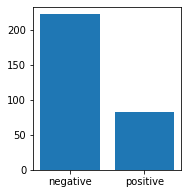

In [ ]:
import matplotlib.pyplot as plt
names = ['negative', 'positive']
values = [counts[0],counts[1]]
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.bar(names, values)

In [ ]:
y_val_pred[8]

1

In [ ]:
data_copy = data

In [ ]:
data.country_code.value_counts()

PK    304
Name: country_code, dtype: int64

In [ ]:
# Reading full directory

import glob
import pandas as pd
directoryPath = '/content/drive/My Drive/NLP/COVID/April_2/'
april_data = pd.DataFrame()
col_list = ["text", "country_code", "lang", "status_id", "user_id"]
for file_name in glob.glob(directoryPath+'*.CSV'):
    print(file_name)

    x = pd.read_csv(file_name, low_memory=False, usecols=col_list)
    x.drop(x.loc[x.lang != 'en'].index, inplace=True)
    indexNames = x[ (x['country_code'] != 'PK') & (x['country_code'] != 'IN') & (x['country_code'] != 'CA') & (x['country_code'] != 'US') & (x['country_code'] != 'SE') & (x['country_code'] != 'NO') & (x['country_code'] != 'BY') & (x['country_code'] != 'BR')  ].index
    x.drop(indexNames , inplace=True)
    x['date'] = file_name[42:52]
    april_data = pd.concat([april_data,x],axis=0)

/content/drive/My Drive/NLP/COVID/April_2/2020-04-16 Coronavirus Tweets.CSV
/content/drive/My Drive/NLP/COVID/April_2/2020-04-17 Coronavirus Tweets.CSV
/content/drive/My Drive/NLP/COVID/April_2/2020-04-18 Coronavirus Tweets.CSV
/content/drive/My Drive/NLP/COVID/April_2/2020-04-19 Coronavirus Tweets.CSV
/content/drive/My Drive/NLP/COVID/April_2/2020-04-20 Coronavirus Tweets.CSV
/content/drive/My Drive/NLP/COVID/April_2/2020-04-21 Coronavirus Tweets.CSV
/content/drive/My Drive/NLP/COVID/April_2/2020-04-22 Coronavirus Tweets.CSV
/content/drive/My Drive/NLP/COVID/April_2/2020-04-23 Coronavirus Tweets.CSV
/content/drive/My Drive/NLP/COVID/April_2/2020-04-24 Coronavirus Tweets.CSV
/content/drive/My Drive/NLP/COVID/April_2/2020-04-25 Coronavirus Tweets.CSV
/content/drive/My Drive/NLP/COVID/April_2/2020-04-26 Coronavirus Tweets.CSV
/content/drive/My Drive/NLP/COVID/April_2/2020-04-27 Coronavirus Tweets.CSV
/content/drive/My Drive/NLP/COVID/April_2/2020-04-28 Coronavirus Tweets.CSV
/content/dri

In [ ]:
april_data.count()

status_id       88507
user_id         88507
text            88507
country_code    88507
lang            88507
date            88507
dtype: int64

In [ ]:
april_data.date.value_counts()

2020-04-16    7925
2020-04-17    7733
2020-04-24    6655
2020-04-22    6246
2020-04-18    6125
2020-04-21    5849
2020-04-23    5795
2020-04-19    5755
2020-04-20    5633
2020-04-29    5548
2020-04-25    5271
2020-04-27    5244
2020-04-28    5148
2020-04-30    4848
2020-04-26    4732
Name: date, dtype: int64

In [ ]:
april_data

,status_id,user_id,text,country_code,lang,date
157,1250574631616069641,626679510,This should make my meetings way more producti...,US,en,2020-04-16
402,1250574746850394117,34578589,"Only during #COVID19 can you work from home, f...",US,en,2020-04-16
553,1250574858091663361,21361348,"FROM MY COLD, DEAD HAND, DR. TEDROS!\n\n#coron...",US,en,2020-04-16
707,1250574966648713216,70834125,One day I will share my story about my #Covid_...,US,en,2020-04-16
873,1250575125709234182,4182841153,Me after a month of quarantine \n\nhttps://t.c...,US,en,2020-04-16
...,...,...,...,...,...,...
355203,1256010180120231936,4894186627,“National Day of Action! From the @TorontoOPS ...,CA,en,2020-04-30
355253,1256010264878645248,16423423,Petal power 🌸 #afternoonrun #covid_19 @ Seward...,US,en,2020-04-30
355323,1256010363440517120,179779935,"If you're going to make me wear a ""face coveri...",US,en,2020-04-30
355355,1256010400279248903,25009031,"Inspiring, hopeful, transformative &amp; power...",US,en,2020-04-30


In [ ]:
writePath = '/content/drive/My Drive/NLP/COVID/cleaned_data/with_dates/April_2.CSV'
april_data.to_csv(writePath, header=True, index = False)

NameError: ignored

In [ ]:
country_sentiment_file('Canada', '/content/drive/My Drive/NLP/COVID/TweetsWIthEMoticonFeb.csv','/content/drive/My Drive/NLP/COVID/Country_Sentiments/feb_dataset/Canada.CSV')

/content/drive/My Drive/NLP/COVID/TweetsWIthEMoticonFeb.csv
total tweets forCanada are id              5367
date            5367
text            5367
emoticon        5367
polarity        5367
subjectivity    5367
country         5367
dtype: int64
Found 18144 unique tokens.
[1 1 1 ... 0 0 0]
(5367,)
                 id            date  ... country sentiment
21990  1.227370e+18  2/12/2020 4:00  ...  Canada         1
21991  1.227360e+18  2/12/2020 3:52  ...  Canada         1
21992  1.227360e+18  2/12/2020 3:46  ...  Canada         1
21993  1.227360e+18  2/12/2020 3:46  ...  Canada         1
21994  1.227360e+18  2/12/2020 3:43  ...  Canada         0
21995  1.227360e+18  2/12/2020 3:40  ...  Canada         1
21996  1.227360e+18  2/12/2020 3:37  ...  Canada         1
21997  1.227360e+18  2/12/2020 3:27  ...  Canada         1
21998  1.227360e+18  2/12/2020 3:26  ...  Canada         0
21999  1.227360e+18  2/12/2020 3:19  ...  Canada         0

[10 rows x 8 columns]


In [ ]:
#extract country wise emoticons
def country_sentiment_file(country_code, input_file, save_path):
  directoryPath = input_file
  cleaned_data = pd.DataFrame()
#col_list = ["text", "country_code","date"]
  file_name = input_file
  print(file_name)

  x = pd.read_csv(file_name, low_memory=False)#, usecols=col_list)
    #x.drop(x.loc[x.lang != 'en'].index, inplace=True)
  #indexNames = x[ (x['country_code'] != 'PK') & (x['country_code'] != 'IN') & (x['country_code'] != 'CA') & (x['country_code'] != 'US') & (x['country_code'] != 'SE') & (x['country_code'] != 'NO') & (x['country_code'] != 'BY') & (x['country_code'] != 'BR')  ].index
  indexNames = x[ (x['country'] != country_code) ].index
  x.drop(indexNames , inplace=True)
  cleaned_data = pd.concat([cleaned_data,x],axis=0)
  
  print("total tweets for"+country_code+" are "+ str(cleaned_data.count()))
  # extract sentiment

  maxlen = 280
  max_words = 40000 
  tokenizer = Tokenizer(num_words=max_words)
  tokenizer.fit_on_texts(cleaned_data['text'])
  sequences = tokenizer.texts_to_sequences(cleaned_data['text'])
  word_index = tokenizer.word_index
  print('Found %s unique tokens.' % len(word_index))
  data1 = pad_sequences(sequences, maxlen=maxlen)
  
  #predictions
  y_val_pred=model2.predict_classes(data1)

  print(y_val_pred)
  print(y_val_pred.shape)

  #get counts
  #unique, counts = numpy.unique(y_val_pred, return_counts=True)
  #with open(filepath, mode='a+') as file:
   # file_writer = csv.writer(save_path, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
   # file_writer.writerow([date, (counts[0] + counts[1]), counts[1], counts[0], (counts[1]/(counts[0] + counts[1]) *100)])
  cleaned_data['sentiment'] = y_val_pred
  print(cleaned_data.head(10))
  cleaned_data.to_csv(save_path, header=True, index = False)
  



In [ ]:
#extract country wise emoticons
def country_sentiment(country_code, input_file, save_path):
  directoryPath = input_file
  cleaned_data = pd.DataFrame()
#col_list = ["text", "country_code","date"]
  for file_name in glob.glob(directoryPath+'*.csv'):
    print(file_name)

    x = pd.read_csv(file_name, low_memory=False)#, usecols=col_list)
    #x.drop(x.loc[x.lang != 'en'].index, inplace=True)
    #indexNames = x[ (x['country_code'] != 'PK') & (x['country_code'] != 'IN') & (x['country_code'] != 'CA') & (x['country_code'] != 'US') & (x['country_code'] != 'SE') & (x['country_code'] != 'NO') & (x['country_code'] != 'BY') & (x['country_code'] != 'BR')  ].index
    indexNames = x[ (x['country'] != country_code) ].index
    x.drop(indexNames , inplace=True)
    cleaned_data = pd.concat([cleaned_data,x],axis=0)
  
  print("total tweets for"+country_code+" are "+ str(cleaned_data.count()))
  # extract sentiment

  maxlen = 280
  max_words = 40000 
  tokenizer = Tokenizer(num_words=max_words)
  tokenizer.fit_on_texts(cleaned_data['text'])
  sequences = tokenizer.texts_to_sequences(cleaned_data['text'])
  word_index = tokenizer.word_index
  print('Found %s unique tokens.' % len(word_index))
  data1 = pad_sequences(sequences, maxlen=maxlen)
  
  #predictions
  y_val_pred=model2.predict_classes(data1)

  print(y_val_pred)
  print(y_val_pred.shape)

  #get counts
  #unique, counts = numpy.unique(y_val_pred, return_counts=True)
  #with open(filepath, mode='a+') as file:
   # file_writer = csv.writer(save_path, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
   # file_writer.writerow([date, (counts[0] + counts[1]), counts[1], counts[0], (counts[1]/(counts[0] + counts[1]) *100)])
  cleaned_data['sentiment'] = y_val_pred
  print(cleaned_data.head(10))
  cleaned_data.to_csv(save_path, header=True, index = False)
  



In [ ]:
y_val_pred

NameError: ignored

In [ ]:
#sentiment extraction from the cleaned data
#USA

import glob
import pandas as pd
directoryPath = '/content/drive/My Drive/NLP/COVID/cleaned_data/data_with_emoticons/'
cleaned_data = pd.DataFrame()
#col_list = ["text", "country_code","date"]
for file_name in glob.glob(directoryPath+'*.csv'):
    print(file_name)

    x = pd.read_csv(file_name, low_memory=False)#, usecols=col_list)
    #x.drop(x.loc[x.lang != 'en'].index, inplace=True)
    #indexNames = x[ (x['country_code'] != 'PK') & (x['country_code'] != 'IN') & (x['country_code'] != 'CA') & (x['country_code'] != 'US') & (x['country_code'] != 'SE') & (x['country_code'] != 'NO') & (x['country_code'] != 'BY') & (x['country_code'] != 'BR')  ].index
    indexNames = x[ (x['country'] != 'PK') ].index
    x.drop(indexNames , inplace=True)
    cleaned_data = pd.concat([cleaned_data,x],axis=0)


/content/drive/My Drive/NLP/COVID/cleaned_data/data_with_emoticons/TweetsWIthEMoticonMarch.csv
/content/drive/My Drive/NLP/COVID/cleaned_data/data_with_emoticons/TweetsWIthEMoticonApril_1.csv
/content/drive/My Drive/NLP/COVID/cleaned_data/data_with_emoticons/TweetsWIthEMoticonApril_2.csv


In [ ]:
cleaned_data.count()

ID              4913
date            9869
text            9869
emoticon        9869
polarity        9869
subjectivity    9869
country         9869
lang            9869
id              4956
dtype: int64

In [ ]:
cleaned_data.count()

text            816
country_code    816
date            816
dtype: int64

In [ ]:
data_country = pd.read_csv('/content/drive/My Drive/NLP/COVID/Country_Sentiments/feb_dataset/Norway.CSV')
data_country.head()

,id,date,text,emoticon,polarity,subjectivity,country,sentiment
0,1.227360e+18,2/12/2020 3:41,Thank use new hashtag covid19 However small he...,[],-0.056818,0.427273,Norway,0
1,1.227350e+18,2/12/2020 3:04,This really Heartbreaking Where get films Is r...,[],0.200000,0.200000,Norway,0
2,1.227310e+18,2/12/2020 0:02,13000 patients fever ... Not 13000 covid19 pat...,[],0.000000,0.000000,Norway,0
3,1.227280e+18,2/11/2020 22:09,The 2nd derivative new coronavirus cases negat...,[],0.087273,0.330909,Norway,1
4,1.227230e+18,2/11/2020 18:40,Rystad expects coronavirus cause Chinese oil d...,[],-0.010000,0.146667,Norway,0


In [ ]:
#remove time from date column
data_country['date'] = pd.to_datetime(data_country['date']).dt.date

In [ ]:
data_country.head()

,id,date,text,emoticon,polarity,subjectivity,country,sentiment
0,1.227360e+18,2020-02-12,Thank use new hashtag covid19 However small he...,[],-0.056818,0.427273,Norway,0
1,1.227350e+18,2020-02-12,This really Heartbreaking Where get films Is r...,[],0.200000,0.200000,Norway,0
2,1.227310e+18,2020-02-12,13000 patients fever ... Not 13000 covid19 pat...,[],0.000000,0.000000,Norway,0
3,1.227280e+18,2020-02-11,The 2nd derivative new coronavirus cases negat...,[],0.087273,0.330909,Norway,1
4,1.227230e+18,2020-02-11,Rystad expects coronavirus cause Chinese oil d...,[],-0.010000,0.146667,Norway,0


In [ ]:
data_country.date.value_counts()

2020-02-28    30
2020-02-27    22
2020-02-25    12
2020-02-26    11
2020-02-04    11
2020-02-12     9
2020-02-03     9
2020-02-14     7
2020-02-23     6
2020-02-24     5
2020-02-06     5
2020-02-18     5
2020-02-11     5
2020-02-19     5
2020-02-09     4
2020-02-17     4
2020-02-16     3
2020-02-07     3
2020-02-15     3
2020-02-29     3
2020-02-05     2
2020-02-13     2
2020-02-08     2
Name: date, dtype: int64

In [ ]:
import datetime
for i in range(3,28):
  if i < 10:
    start_date = '2020-02-0' + str(i)
    end_date = '2020-02-0' + str(i)
  else:
    start_date = '2020-02-' + str(i)
    end_date = '2020-02-' + str(i)
  print(start_date)
  after_start_date = data_country["date"] >= pd.to_datetime(start_date)
  before_end_date = data_country["date"] <= pd.to_datetime(end_date)
  between_two_dates = after_start_date & before_end_date
  filtered_dates = data_country.loc[between_two_dates]
  if filtered_dates.text.size > 3:
      one_day_sentiment(filtered_dates,'/content/drive/My Drive/NLP/COVID/Country_Sentiments/feb_dataset/day_wise/Norway.csv',start_date)

2020-02-03
Found 161 unique tokens.
2020-02-04
Found 136 unique tokens.
2020-02-05
2020-02-06
Found 94 unique tokens.
2020-02-07
2020-02-08
2020-02-09
Found 75 unique tokens.
2020-02-10
2020-02-11
Found 109 unique tokens.
2020-02-12
Found 170 unique tokens.
2020-02-13
2020-02-14
Found 121 unique tokens.
2020-02-15
2020-02-16
2020-02-17
Found 85 unique tokens.
2020-02-18
Found 123 unique tokens.
2020-02-19
Found 137 unique tokens.
2020-02-20
2020-02-21
2020-02-22
2020-02-23
Found 108 unique tokens.
2020-02-24
Found 116 unique tokens.
2020-02-25
Found 208 unique tokens.
2020-02-26
Found 209 unique tokens.
2020-02-27
Found 287 unique tokens.


In [ ]:
filtered_dates.date.value_counts()

Series([], Name: date, dtype: int64)

In [ ]:
import csv
def one_day_sentiment(one_day_data,filepath,date):
  maxlen = 280
  max_words = 40000 
  tokenizer = Tokenizer(num_words=max_words)
  tokenizer.fit_on_texts(one_day_data['text'])
  sequences = tokenizer.texts_to_sequences(one_day_data['text'])
  word_index = tokenizer.word_index
  print('Found %s unique tokens.' % len(word_index))
  data1 = pad_sequences(sequences, maxlen=maxlen)
  
  #predictions
  y_val_pred=model2.predict_classes(data1)

  #get counts
  unique, counts = numpy.unique(y_val_pred, return_counts=True)
  
  with open(filepath, mode='a+') as file:
    file_writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    file_writer.writerow([date, (counts[0] + counts[1]), counts[1], counts[0], (counts[1]/(counts[0] + counts[1]) *100)])
    
 
  









In [ ]:
%tensorflow_version 1.x



from keras import backend as K
#K.tensorflow_backend._get_available_gpus()


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.metrics import precision_score , recall_score
import numpy as numpy

TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
%tensorflow_version 1.x



from keras import backend as K
#K.tensorflow_backend._get_available_gpus()


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 280
max_words = 40000
tokenizer = Tokenizer(num_words=max_words)
#tokenizer.fit_on_texts(data['Tweet'])
#sequences = tokenizer.texts_to_sequences(data['Tweet'])

tokenizer.fit_on_texts(cleaned_data['text'])
sequences = tokenizer.texts_to_sequences(cleaned_data['text'])

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data1 = pad_sequences(sequences, maxlen=maxlen)
print(data1)

TensorFlow 1.x selected.


Using TensorFlow backend.


Found 147362 unique tokens.
[[    0     0     0 ...     3     2     1]
 [    0     0     0 ... 13281     9   566]
 [    0     0     0 ...     3     2     1]
 ...
 [    0     0     0 ...    24 28344 21763]
 [    0     0     0 ...     3     2     1]
 [    0     0     0 ...     3     2     1]]


In [ ]:
from sklearn.metrics import precision_score , recall_score
y_val_pred=model2.predict_classes(data1)

In [ ]:
 import numpy as numpy
 unique, counts = numpy.unique(y_val_pred, return_counts=True)

<BarContainer object of 2 artists>

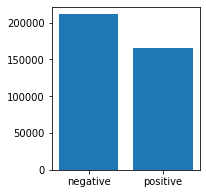

In [ ]:
import matplotlib.pyplot as plt
names = ['negative', 'positive']
values = [counts[0],counts[1]]
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.bar(names, values)

In [ ]:
print(counts[0])
print(counts[1])

211138
166001


In [ ]:
#India 

import glob
import pandas as pd
directoryPath = '/content/drive/My Drive/NLP/COVID/cleaned_data/'
cleaned_data = pd.DataFrame()
col_list = ["text", "country_code"]
for file_name in glob.glob(directoryPath+'*.CSV'):
    print(file_name)

    x = pd.read_csv(file_name, low_memory=False, usecols=col_list)
    #x.drop(x.loc[x.lang != 'en'].index, inplace=True)
    #indexNames = x[ (x['country_code'] != 'PK') & (x['country_code'] != 'IN') & (x['country_code'] != 'CA') & (x['country_code'] != 'US') & (x['country_code'] != 'SE') & (x['country_code'] != 'NO') & (x['country_code'] != 'BY') & (x['country_code'] != 'BR')  ].index
    indexNames = x[ (x['country_code'] != 'IN') ].index
    x.drop(indexNames , inplace=True)
    cleaned_data = pd.concat([cleaned_data,x],axis=0)


/content/drive/My Drive/NLP/COVID/cleaned_data/March.CSV
/content/drive/My Drive/NLP/COVID/cleaned_data/April_1.CSV
/content/drive/My Drive/NLP/COVID/cleaned_data/April_2.CSV


In [ ]:
%tensorflow_version 1.x



from keras import backend as K
#K.tensorflow_backend._get_available_gpus()


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 280
max_words = 40000
tokenizer = Tokenizer(num_words=max_words)
#tokenizer.fit_on_texts(data['Tweet'])
#sequences = tokenizer.texts_to_sequences(data['Tweet'])

tokenizer.fit_on_texts(cleaned_data['text'])
sequences = tokenizer.texts_to_sequences(cleaned_data['text'])

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data1 = pad_sequences(sequences, maxlen=maxlen)
print(data1)

TensorFlow is already loaded. Please restart the runtime to change versions.
Found 112426 unique tokens.
[[    0     0     0 ...     3     2     1]
 [    0     0     0 ... 25608     9   580]
 [    0     0     0 ...     3     2     1]
 ...
 [    0     0     0 ...     3     2     1]
 [    0     0     0 ...     3     2     1]
 [    0     0     0 ...   574    37    10]]


In [ ]:
from sklearn.metrics import precision_score , recall_score
y_val_pred=model2.predict_classes(data1)

In [ ]:
 import numpy as numpy
 unique, counts = numpy.unique(y_val_pred, return_counts=True)

<BarContainer object of 2 artists>

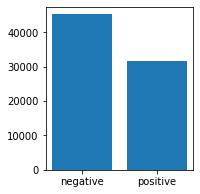

In [ ]:
import matplotlib.pyplot as plt
names = ['negative', 'positive']
values = [counts[0],counts[1]]
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.bar(names, values)

In [ ]:
print(counts[0])
print(counts[1])

45140
31533


In [ ]:
#Pakistan

import glob
import pandas as pd
directoryPath = '/content/drive/My Drive/NLP/COVID/cleaned_data/'
cleaned_data = pd.DataFrame()
col_list = ["text", "country_code"]
for file_name in glob.glob(directoryPath+'*.CSV'):
    print(file_name)

    x = pd.read_csv(file_name, low_memory=False, usecols=col_list)
    #x.drop(x.loc[x.lang != 'en'].index, inplace=True)
    #indexNames = x[ (x['country_code'] != 'PK') & (x['country_code'] != 'IN') & (x['country_code'] != 'CA') & (x['country_code'] != 'US') & (x['country_code'] != 'SE') & (x['country_code'] != 'NO') & (x['country_code'] != 'BY') & (x['country_code'] != 'BR')  ].index
    indexNames = x[ (x['country_code'] != 'PK') ].index
    x.drop(indexNames , inplace=True)
    cleaned_data = pd.concat([cleaned_data,x],axis=0)


/content/drive/My Drive/NLP/COVID/cleaned_data/March.CSV
/content/drive/My Drive/NLP/COVID/cleaned_data/April_1.CSV
/content/drive/My Drive/NLP/COVID/cleaned_data/April_2.CSV


In [ ]:
%tensorflow_version 1.x



from keras import backend as K
#K.tensorflow_backend._get_available_gpus()


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 280
max_words = 40000
tokenizer = Tokenizer(num_words=max_words)
#tokenizer.fit_on_texts(data['Tweet'])
#sequences = tokenizer.texts_to_sequences(data['Tweet'])

tokenizer.fit_on_texts(cleaned_data['text'])
sequences = tokenizer.texts_to_sequences(cleaned_data['text'])

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data1 = pad_sequences(sequences, maxlen=maxlen)
print(data1)

TensorFlow is already loaded. Please restart the runtime to change versions.
Found 25785 unique tokens.
[[    0     0     0 ...   126   195  4056]
 [    0     0     0 ...  1273     6   938]
 [    0     0     0 ...     3     2 16992]
 ...
 [    0     0     0 ...    12    32    20]
 [    0     0     0 ...    10    12    25]
 [    0     0     0 ... 16985   480 16986]]


In [ ]:
from sklearn.metrics import precision_score , recall_score
y_val_pred=model2.predict_classes(data1)

In [ ]:
 import numpy as numpy
 unique, counts = numpy.unique(y_val_pred, return_counts=True)

<BarContainer object of 2 artists>

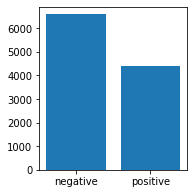

In [ ]:
import matplotlib.pyplot as plt
names = ['negative', 'positive']
values = [counts[0],counts[1]]
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.bar(names, values)

In [ ]:
print(counts[0])
print(counts[1])

6585
4394


In [ ]:
# Canada

import glob
import pandas as pd
directoryPath = '/content/drive/My Drive/NLP/COVID/cleaned_data/'
cleaned_data = pd.DataFrame()
col_list = ["text", "country_code"]
for file_name in glob.glob(directoryPath+'*.CSV'):
    print(file_name)

    x = pd.read_csv(file_name, low_memory=False, usecols=col_list)
    #x.drop(x.loc[x.lang != 'en'].index, inplace=True)
    #indexNames = x[ (x['country_code'] != 'PK') & (x['country_code'] != 'IN') & (x['country_code'] != 'CA') & (x['country_code'] != 'US') & (x['country_code'] != 'SE') & (x['country_code'] != 'NO') & (x['country_code'] != 'BY') & (x['country_code'] != 'BR')  ].index
    indexNames = x[ (x['country_code'] != 'CA') ].index
    x.drop(indexNames , inplace=True)
    cleaned_data = pd.concat([cleaned_data,x],axis=0)


/content/drive/My Drive/NLP/COVID/cleaned_data/March.CSV
/content/drive/My Drive/NLP/COVID/cleaned_data/April_1.CSV
/content/drive/My Drive/NLP/COVID/cleaned_data/April_2.CSV


In [ ]:
%tensorflow_version 1.x



from keras import backend as K
#K.tensorflow_backend._get_available_gpus()


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 280
max_words = 40000
tokenizer = Tokenizer(num_words=max_words)
#tokenizer.fit_on_texts(data['Tweet'])
#sequences = tokenizer.texts_to_sequences(data['Tweet'])

tokenizer.fit_on_texts(cleaned_data['text'])
sequences = tokenizer.texts_to_sequences(cleaned_data['text'])

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data1 = pad_sequences(sequences, maxlen=maxlen)
print(data1)

TensorFlow is already loaded. Please restart the runtime to change versions.
Found 80969 unique tokens.
[[   0    0    0 ...  280  520 2110]
 [   0    0    0 ... 2805   29 8045]
 [   0    0    0 ...    4    2    3]
 ...
 [   0    0    0 ...    2    3  401]
 [   0    0    0 ...    2    3  884]
 [   0    0    0 ...    4    2    3]]


In [ ]:
from sklearn.metrics import precision_score , recall_score
y_val_pred=model2.predict_classes(data1)

In [ ]:
 import numpy as numpy
 unique, counts = numpy.unique(y_val_pred, return_counts=True)

<BarContainer object of 2 artists>

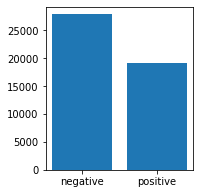

In [ ]:
import matplotlib.pyplot as plt
names = ['negative', 'positive']
values = [counts[0],counts[1]]
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.bar(names, values)

In [ ]:
print(counts[0])
print(counts[1])

27840
19184


In [ ]:
#Sweden

import glob
import pandas as pd
directoryPath = '/content/drive/My Drive/NLP/COVID/cleaned_data/'
cleaned_data = pd.DataFrame()
col_list = ["text", "country_code"]
for file_name in glob.glob(directoryPath+'*.CSV'):
    print(file_name)

    x = pd.read_csv(file_name, low_memory=False, usecols=col_list)
    #x.drop(x.loc[x.lang != 'en'].index, inplace=True)
    #indexNames = x[ (x['country_code'] != 'PK') & (x['country_code'] != 'IN') & (x['country_code'] != 'CA') & (x['country_code'] != 'US') & (x['country_code'] != 'SE') & (x['country_code'] != 'NO') & (x['country_code'] != 'BY') & (x['country_code'] != 'BR')  ].index
    indexNames = x[ (x['country_code'] != 'SE') ].index
    x.drop(indexNames , inplace=True)
    cleaned_data = pd.concat([cleaned_data,x],axis=0)


/content/drive/My Drive/NLP/COVID/cleaned_data/March.CSV
/content/drive/My Drive/NLP/COVID/cleaned_data/April_1.CSV
/content/drive/My Drive/NLP/COVID/cleaned_data/April_2.CSV


In [ ]:
%tensorflow_version 1.x



from keras import backend as K
#K.tensorflow_backend._get_available_gpus()


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 280
max_words = 40000
tokenizer = Tokenizer(num_words=max_words)
#tokenizer.fit_on_texts(data['Tweet'])
#sequences = tokenizer.texts_to_sequences(data['Tweet'])

tokenizer.fit_on_texts(cleaned_data['text'])
sequences = tokenizer.texts_to_sequences(cleaned_data['text'])

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data1 = pad_sequences(sequences, maxlen=maxlen)
print(data1)

TensorFlow is already loaded. Please restart the runtime to change versions.
Found 4921 unique tokens.
[[   0    0    0 ...    1   39   45]
 [   0    0    0 ... 3302 3303  435]
 [   0    0    0 ...    3    2 3307]
 ...
 [   0    0    0 ... 3278   12  138]
 [   0    0    0 ...    3    2 3279]
 [   0    0    0 ...    3    2 3287]]


In [ ]:
from sklearn.metrics import precision_score , recall_score
y_val_pred=model2.predict_classes(data1)

In [ ]:
 import numpy as numpy
 unique, counts = numpy.unique(y_val_pred, return_counts=True)

<BarContainer object of 2 artists>

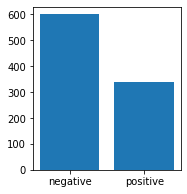

In [ ]:
import matplotlib.pyplot as plt
names = ['negative', 'positive']
values = [counts[0],counts[1]]
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.bar(names, values)

In [ ]:
print(counts[0])
print(counts[1])

600
341


In [ ]:
#Norway

import glob
import pandas as pd
directoryPath = '/content/drive/My Drive/NLP/COVID/cleaned_data/'
cleaned_data = pd.DataFrame()
col_list = ["text", "country_code"]
for file_name in glob.glob(directoryPath+'*.CSV'):
    print(file_name)

    x = pd.read_csv(file_name, low_memory=False, usecols=col_list)
    #x.drop(x.loc[x.lang != 'en'].index, inplace=True)
    #indexNames = x[ (x['country_code'] != 'PK') & (x['country_code'] != 'IN') & (x['country_code'] != 'CA') & (x['country_code'] != 'US') & (x['country_code'] != 'SE') & (x['country_code'] != 'NO') & (x['country_code'] != 'BY') & (x['country_code'] != 'BR')  ].index
    indexNames = x[ (x['country_code'] != 'NO') ].index
    x.drop(indexNames , inplace=True)
    cleaned_data = pd.concat([cleaned_data,x],axis=0)


/content/drive/My Drive/NLP/COVID/cleaned_data/March.CSV
/content/drive/My Drive/NLP/COVID/cleaned_data/April_1.CSV
/content/drive/My Drive/NLP/COVID/cleaned_data/April_2.CSV


In [ ]:
%tensorflow_version 1.x



from keras import backend as K
#K.tensorflow_backend._get_available_gpus()


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 280
max_words = 40000
tokenizer = Tokenizer(num_words=max_words)
#tokenizer.fit_on_texts(data['Tweet'])
#sequences = tokenizer.texts_to_sequences(data['Tweet'])

tokenizer.fit_on_texts(cleaned_data['text'])
sequences = tokenizer.texts_to_sequences(cleaned_data['text'])

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data1 = pad_sequences(sequences, maxlen=maxlen)
print(data1)

TensorFlow is already loaded. Please restart the runtime to change versions.
Found 3359 unique tokens.
[[   0    0    0 ...    2    4 2097]
 [   0    0    0 ...    2    4 2105]
 [   0    0    0 ...    2    4 2108]
 ...
 [   0    0    0 ...   90  530  790]
 [   0    0    0 ... 2084   46    6]
 [   0    0    0 ...    2    4 2094]]


In [ ]:
from sklearn.metrics import precision_score , recall_score
y_val_pred=model2.predict_classes(data1)

In [ ]:
 import numpy as numpy
 unique, counts = numpy.unique(y_val_pred, return_counts=True)

<BarContainer object of 2 artists>

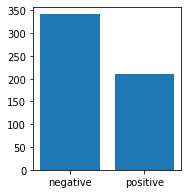

In [ ]:
import matplotlib.pyplot as plt
names = ['negative', 'positive']
values = [counts[0],counts[1]]
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.bar(names, values)

In [ ]:
print(counts[0])
print(counts[1])

341
210


In [ ]:
#Balarus

import glob
import pandas as pd
directoryPath = '/content/drive/My Drive/NLP/COVID/cleaned_data/'
cleaned_data = pd.DataFrame()
col_list = ["text", "country_code"]
for file_name in glob.glob(directoryPath+'*.CSV'):
    print(file_name)

    x = pd.read_csv(file_name, low_memory=False, usecols=col_list)
    #x.drop(x.loc[x.lang != 'en'].index, inplace=True)
    #indexNames = x[ (x['country_code'] != 'PK') & (x['country_code'] != 'IN') & (x['country_code'] != 'CA') & (x['country_code'] != 'US') & (x['country_code'] != 'SE') & (x['country_code'] != 'NO') & (x['country_code'] != 'BY') & (x['country_code'] != 'BR')  ].index
    indexNames = x[ (x['country_code'] != 'BY') ].index
    x.drop(indexNames , inplace=True)
    cleaned_data = pd.concat([cleaned_data,x],axis=0)


/content/drive/My Drive/NLP/COVID/cleaned_data/March.CSV
/content/drive/My Drive/NLP/COVID/cleaned_data/April_1.CSV
/content/drive/My Drive/NLP/COVID/cleaned_data/April_2.CSV


In [ ]:
%tensorflow_version 1.x



from keras import backend as K
#K.tensorflow_backend._get_available_gpus()


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 280
max_words = 40000
tokenizer = Tokenizer(num_words=max_words)
#tokenizer.fit_on_texts(data['Tweet'])
#sequences = tokenizer.texts_to_sequences(data['Tweet'])

tokenizer.fit_on_texts(cleaned_data['text'])
sequences = tokenizer.texts_to_sequences(cleaned_data['text'])

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data1 = pad_sequences(sequences, maxlen=maxlen)
print(data1)

TensorFlow is already loaded. Please restart the runtime to change versions.
Found 293 unique tokens.
[[  0   0   0 ...   4   5 210]
 [  0   0   0 ...   4   5 237]
 [  0   0   0 ...   4   5 247]
 ...
 [  0   0   0 ...   4   5 176]
 [  0   0   0 ...   4   5 193]
 [  0   0   0 ...   4   5 203]]


In [ ]:
from sklearn.metrics import precision_score , recall_score
y_val_pred=model2.predict_classes(data1)

In [ ]:
 import numpy as numpy
 unique, counts = numpy.unique(y_val_pred, return_counts=True)

<BarContainer object of 2 artists>

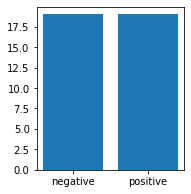

In [ ]:
import matplotlib.pyplot as plt
names = ['negative', 'positive']
values = [counts[0],counts[1]]
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.bar(names, values)

In [ ]:
print(counts[0])
print(counts[1])

19
19


In [ ]:
#Brazil

import glob
import pandas as pd
directoryPath = '/content/drive/My Drive/NLP/COVID/cleaned_data/'
cleaned_data = pd.DataFrame()
col_list = ["text", "country_code"]
for file_name in glob.glob(directoryPath+'*.CSV'):
    print(file_name)

    x = pd.read_csv(file_name, low_memory=False, usecols=col_list)
    #x.drop(x.loc[x.lang != 'en'].index, inplace=True)
    #indexNames = x[ (x['country_code'] != 'PK') & (x['country_code'] != 'IN') & (x['country_code'] != 'CA') & (x['country_code'] != 'US') & (x['country_code'] != 'SE') & (x['country_code'] != 'NO') & (x['country_code'] != 'BY') & (x['country_code'] != 'BR')  ].index
    indexNames = x[ (x['country_code'] != 'BR') ].index
    x.drop(indexNames , inplace=True)
    cleaned_data = pd.concat([cleaned_data,x],axis=0)


/content/drive/My Drive/NLP/COVID/cleaned_data/March.CSV
/content/drive/My Drive/NLP/COVID/cleaned_data/April_1.CSV
/content/drive/My Drive/NLP/COVID/cleaned_data/April_2.CSV


In [ ]:
%tensorflow_version 1.x



from keras import backend as K
#K.tensorflow_backend._get_available_gpus()


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 280
max_words = 40000
tokenizer = Tokenizer(num_words=max_words)
#tokenizer.fit_on_texts(data['Tweet'])
#sequences = tokenizer.texts_to_sequences(data['Tweet'])

tokenizer.fit_on_texts(cleaned_data['text'])
sequences = tokenizer.texts_to_sequences(cleaned_data['text'])

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data1 = pad_sequences(sequences, maxlen=maxlen)
print(data1)

TensorFlow is already loaded. Please restart the runtime to change versions.
Found 5839 unique tokens.
[[   0    0    0 ...    1    3 3452]
 [   0    0    0 ...   13    7 1519]
 [   0    0    0 ...    1    3 3462]
 ...
 [   0    0    0 ...    1    3 3444]
 [   0    0    0 ...    1    3 3446]
 [   0    0    0 ...    1    3 3447]]


In [ ]:
from sklearn.metrics import precision_score , recall_score
y_val_pred=model2.predict_classes(data1)

In [ ]:
 import numpy as numpy
 unique, counts = numpy.unique(y_val_pred, return_counts=True)

<BarContainer object of 2 artists>

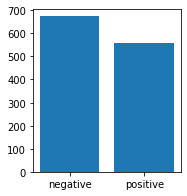

In [ ]:
import matplotlib.pyplot as plt
names = ['negative', 'positive']
values = [counts[0],counts[1]]
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.bar(names, values)

In [ ]:
print(counts[0])
print(counts[1])

673
560


In [ ]:
# reading all countries
#sentiment extraction from the cleaned data
#USA

import glob
import pandas as pd
directoryPath = '/content/drive/My Drive/NLP/COVID/cleaned_data/'
cleaned_data = pd.DataFrame()
col_list = ["text", "country_code"]
for file_name in glob.glob(directoryPath+'*.CSV'):
    print(file_name)

    x = pd.read_csv(file_name, low_memory=False, usecols=col_list)
    #x.drop(x.loc[x.lang != 'en'].index, inplace=True)
    #indexNames = x[ (x['country_code'] != 'PK') & (x['country_code'] != 'IN') & (x['country_code'] != 'CA') & (x['country_code'] != 'US') & (x['country_code'] != 'SE') & (x['country_code'] != 'NO') & (x['country_code'] != 'BY') & (x['country_code'] != 'BR')  ].index
    #indexNames = x[ (x['country_code'] != 'US') ].index
    #x.drop(indexNames , inplace=True)
    cleaned_data = pd.concat([cleaned_data,x],axis=0)


/content/drive/My Drive/NLP/COVID/cleaned_data/March.CSV
/content/drive/My Drive/NLP/COVID/cleaned_data/April_1.CSV
/content/drive/My Drive/NLP/COVID/cleaned_data/April_2.CSV


In [ ]:
cleaned_data.country_code.value_counts()

US    377139
IN     76673
CA     47024
PK     10979
BR      1233
SE       941
NO       551
BY        38
Name: country_code, dtype: int64